<a href="https://colab.research.google.com/github/ravichas/bioinformatics/blob/main/BioConductor/C11_2_Fisher_Test_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepared for C11-BIFX-550

In [5]:
# prompt: wget https://github.com/ravichas/bioinformatics/blob/main/data/GSE1397_series_matrix.txt.gz and untar

# Download the file
download.file('https://github.com/ravichas/bioinformatics/raw/main/data/GEO2R-GSE1397-output.txt.tar.gz', destfile = 'data.gz')

# Untar the file
untar('data.gz', exdir = 'data')


In [13]:
data <- read.table("data/GEO2R-GSE1397-output.txt",sep="\t",header=TRUE,stringsAsFactors = FALSE)
nrow(data) #22283 rows or genes

head(data)[1:3,]

[1] 22283

,ID,adj.P.Val,P.Value,t,B,logFC,Gene.symbol,Gene.title,Gene.ID,Chromosome.location,Chromosome.annotation,UniGene.title,UniGene.symbol,UniGene.ID,Nucleotide.Title,GI,GenBank.Accession,Platform_CLONEID,Platform_ORF,Platform_SPOTID
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<lgl>,<lgl>,<chr>
1,206777_s_at,0.0304,1.36e-06,6.488139,-1.54,2.2229385,CRYBB2P1///CRYBB2,"crystallin, beta B2 pseudogene 1///crystallin, beta B2",1416///1415,22q11.2-q12.1///22q11.23,"Chromosome 22, NC_000022.11 (25448087..25461678)///Chromosome 22, NC_000022.11 (25212828..25231869)",,,,"Homo sapiens crystallin, beta B2 (CRYBB2), mRNA",98986448,NM_000496,NA,NA,
2,201123_s_at,0.0402,4.54e-06,5.975773,-1.76,1.8454957,EIF5A,eukaryotic translation initiation factor 5A,1984,17p13-p12,"Chromosome 17, NC_000017.11 (7306999..7312463)",,,,"Homo sapiens eukaryotic translation initiation factor 5A (EIF5A), transcript variant B, mRNA",219555708,NM_001970,NA,NA,
3,201122_x_at,0.0402,5.42e-06,5.901872,-1.79,0.9023283,EIF5A,eukaryotic translation initiation factor 5A,1984,17p13-p12,"Chromosome 17, NC_000017.11 (7306999..7312463)",,,,"Homo sapiens eukaryotic translation initiation factor 5A, mRNA (cDNA clone MGC:2453 IMAGE:2961296), complete cds",33875811,BC000751,NA,NA,


In [14]:
data15 <- data15[1:15,]
names(data15)

[1] "ID"                    "adj.P.Val"             "P.Value"              
 [4] "t"                     "B"                     "logFC"                
 [7] "Gene.symbol"           "Gene.title"            "Gene.ID"              
[10] "Chromosome.location"   "Chromosome.annotation" "UniGene.title"        
[13] "UniGene.symbol"        "UniGene.ID"            "Nucleotide.Title"     
[16] "GI"                    "GenBank.Accession"     "Platform_CLONEID"     
[19] "Platform_ORF"          "Platform_SPOTID"

In [15]:
# how to remove entries that contain AFF in their ID
# controls that you want to remove
#install.packages("dplyr")
library(dplyr)
Control <- filter(data,grepl("AFF",data$ID))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [16]:
# or you get the IDs using this approach
ControlRowNumbers <- which(data$Platform_SPOTID == "--Control")
# explore the first entry
# remove them from data
cdata <- data[-ControlRowNumbers, ]
#checking
which(cdata$Platform_SPOTID == "--Control")

integer(0)

In [17]:
nrow(cdata) #22215
nrow(data)  #22283

[1] 22215

[1] 22283

How many do not have a gene Symbol data$Gene.symbol

In [19]:
NoGeneSymIDs<- which(cdata$Gene.symbol == "")
nrow(cdata) - length(NoGeneSymIDs)

[1] 21083

In [20]:
how_many_from_21 <- grepl("21",data15$Chromosome.location)
table(how_many_from_21)

how_many_from_21
FALSE  TRUE 
    6     9 

In [21]:

mychr21data <- matrix(c(9,6,671,53834))

# example from Jonathan Pevsner book

is the occurance of 9 chr21 derived transcript out of 15
statisitcally significant?

671 chr21 genes  and 53,834 non-chr21 genes in GRCh38
we can use fisher's test to check whether 9 transcripts from chr21 are more than what we expect by chance

In [22]:

mychr21data <- matrix(c(9, 15, 671,53834),2,2)
mychr21data

9,671
15,53834


Different from the way shown in the book
order doesnt matter but more meaningful this way

In [23]:
row.names(mychr21data) <- c("Sig","nonSig")
colnames(mychr21data) <- c("chr21", "nchr21")
mychr21data
fisher.test(mychr21data,alternative="two.sided")

,chr21,nchr21
Sig,9,671
nonSig,15,53834



	Fisher's Exact Test for Count Data

data:  mychr21data
p-value = 7.657e-12
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  18.49852 117.55474
sample estimates:
odds ratio 
  48.07209 


The p value is very samll so, we can reject the null hypothesis

Would the finding be significant if we have 2 out of 15?


In [24]:
mychr21data <- matrix(c(2,13,671,53834),2,2)
mychr21data
fisher.test(mychr21data,alternative="two.sided")

2,671
13,53834



	Fisher's Exact Test for Count Data

data:  mychr21data
p-value = 0.01436
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  1.349511 54.636938
sample estimates:
odds ratio 
  12.34114 


The p value is still very samll (< 0.05) so, we are still going to reject the null hypothesis

ttest for variability
mean of 10 and 20 significant

[1] 10

[1] 3.333333

[1] 20

[1] 3.333333


	Welch Two Sample t-test

data:  x and y
t = -7.746, df = 6, p-value = 0.0002433
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -13.15895  -6.84105
sample estimates:
mean of x mean of y 
       10        20 


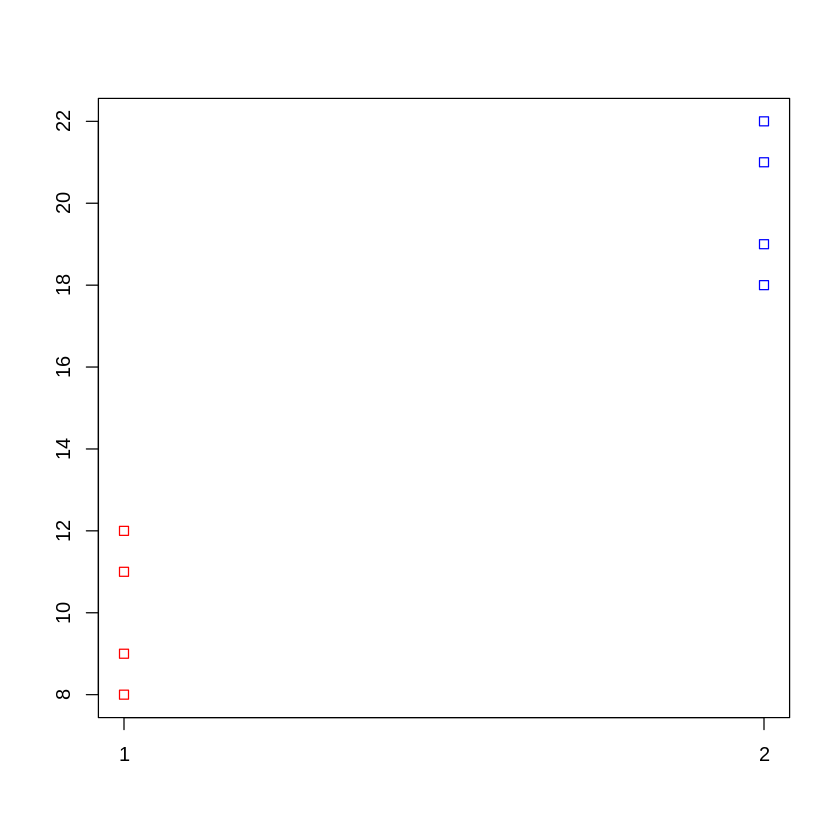

In [25]:
x <- c(8,12,9,11)
mean(x); var(x)
y <- c(18,22,19,21)
mean(y); var(y)
t.test(x,y)

stripchart(list(x,y), jitter = T, vertical = T, col = c("red","blue") )

In [27]:
# ttest for variability
# low variability not significant

x <- c(8,12,9,11)
mean(x); var(x)
y <- c(12,12,12,12)

mean(y); var(y)



[1] 10

[1] 3.333333

[1] 12

[1] 0


	Welch Two Sample t-test

data:  x and y
t = -2.1909, df = 3, p-value = 0.1162
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.9051627  0.9051627
sample estimates:
mean of x mean of y 
       10        12 


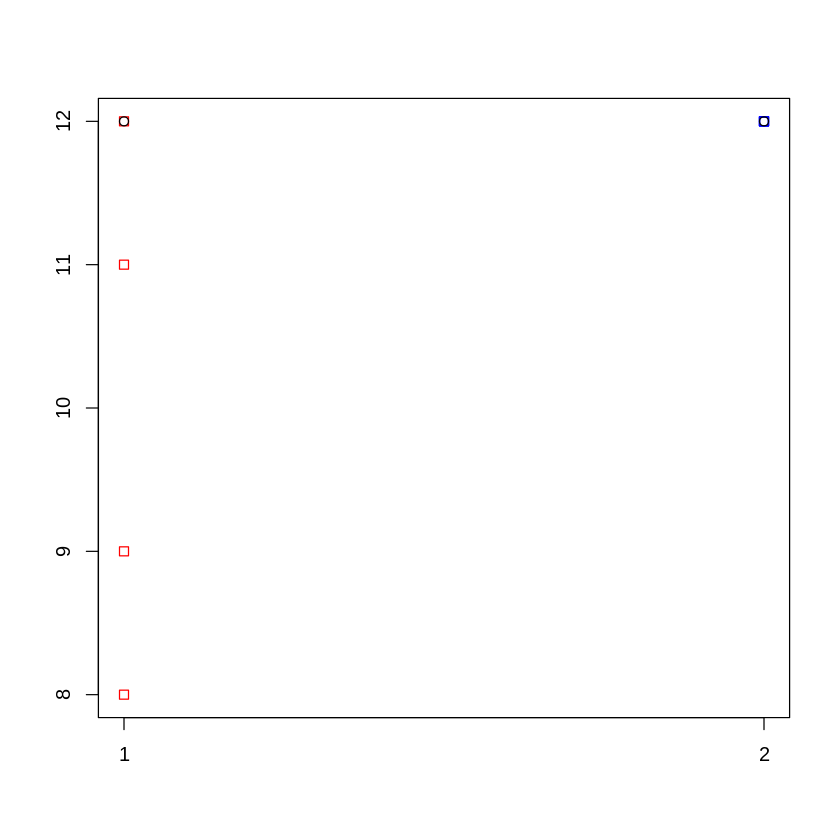

In [29]:
t.test(x,y)
stripchart(list(x,y), jitter = T, vertical = T, col = c("red","blue") )
points(y)

[1] 10

[1] 3.333333

[1] 14

[1] 0


	Welch Two Sample t-test

data:  x and y
t = -4.3818, df = 3, p-value = 0.02201
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -6.905163 -1.094837
sample estimates:
mean of x mean of y 
       10        14 


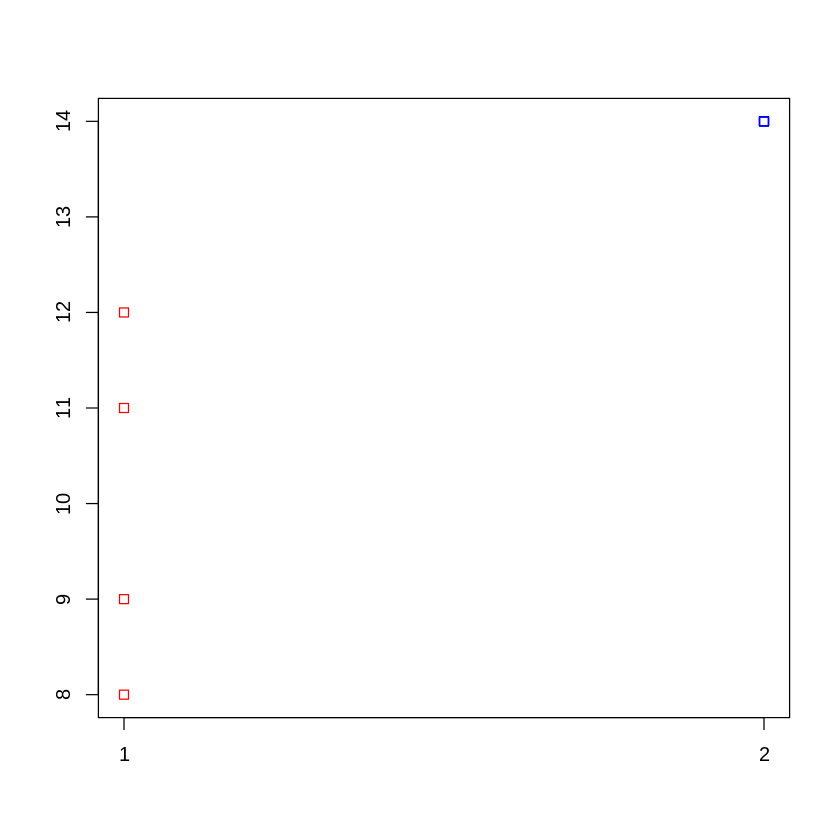

In [30]:
x <- c(8,12,9,11)
mean(x); var(x)
y <- c(14,14,14,14)
mean(y); var(y)
t.test(x,y)

stripchart(list(x,y), jitter = T, vertical = T, col = c("red","blue") )

